<a href="https://colab.research.google.com/github/rupeshthapa123/NotebookProject/blob/main/RupeshThapa_Lab2_Probability.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 2. Probability

In this lab, you will gain knowledge on some concepts of probability that will be useful when defining distributions.

Importing necessary visualisation python library such as matplotlib and seaborn.
Seaborn and Matplotlib are two of Python's most powerful visualization libraries. Seaborn uses fewer syntax and has stunning default themes and Matplotlib is more easily customizable through accessing the classes.

In [ ]:
%matplotlib inline
import matplotlib
import seaborn as sns
sns.set()
matplotlib.rcParams['figure.dpi'] = 144

Q1. What is usage of function sns.set()?



sns.set() is the function of seaborn library that will load a seaborns default theme and color palette to the session. Once we load seaborn into the session, everytime a matplotlib plot is executed, seaborn's default customizations are added.

# Probability

<!-- requirement: images/rv_flowchart.png -->

Importing necessary library such as numpy, scipy, pandas and matplotlib.pylab for performing numerical and scientific functions along with data visualisation.

In [ ]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pylab as plt

##Importing a library
###scipy.stats.norm
A normal continuous random variable.

The location (loc) keyword specifies the mean. The scale (scale) keyword specifies the standard deviation.

As an instance of the rv_continuous class, norm object inherits from it a collection of generic methods (see below for the full list), and completes them with details specific for this particular distribution.
The probability density function for norm is:
$$f(x)=\frac{exp(-x^2/2)}{\sqrt{2\pi}}$$

for a real number x.
The probability density above is defined in the “standardized” form.

##Function
These functions are used to plot the histogram and probability distribution function (PDF) of random variables (rvs) with a given probability distribution (dist). The two functions `plot_hist_dist` and `plot_hist_dist_discrete` handle discrete and continuous random variables, respectively.

In [ ]:
# Importing a normal continuous random variable library
from scipy.stats import norm
def plot_hist_dist(rvs, dist, title=None, label='', ax=None, line_color='black', bar_color='blue'):
    """
    Plot a histogram and probability density function (pdf) of a given set of random variables (rvs) and a specified distribution.
    @param rvs - the random variables to plot
    @param dist - the distribution to compare against
    @param title - the title of the plot
    @param label - the label for the legend
    @param ax - the axis object to plot on
    @param line_color - the color of the line representing the pdf (default: 'black')
    @param bar_color - the color of the bars representing the histogram (default: 'blue')
    """
    # Get the axis object to plot on
    ax = ax if ax else plt.gca()
    # Plot the histogram of the random variables
    _, bins, _ = ax.hist(rvs, bins=50, alpha=.6, density=True, label=(label + ' rvs').strip(), color=bar_color)
    # Get the min and max values of the x-axis
    xmin, xmax = bins.min(), bins.max()
    # Create an array of x-values to plot the pdf(density function)
    xpoints = np.arange(xmin, xmax, (xmax - xmin) / 100)
    # Plot the pdf of the distribution
    ax.plot(xpoints, dist.pdf(xpoints), label=(label+' pdf').strip(), color=line_color)
    if title:
        ax.set_title(title)
    # Add a legend to the plot
    ax.legend()

def plot_hist_dist_discrete(rvs, dist, title=None, label='', ax=None, line_color='black', bar_color='blue'):
    '''Plot a histogram of the distribution of random variables and the probability mass function of the distribution'''
    # Set the axis if it is not already set
    ax = ax if ax else plt.gca()
    # Get the unique values of the random variables
    uniques = np.unique(rvs)
    # Calculate the midpoints of the unique values
    mids = (uniques[1:] + uniques[:-1]) / 2.
    # Create an array of the unique values with the midpoints and endpoints of the unique values
    bins = np.hstack([[uniques[0]-.5], mids, [uniques[-1] + .5]])
    # Plot the histogram of the random variables
    plt.hist(rvs, bins=bins, density=True, label=(label + ' rvs').strip(), alpha=.6, color=bar_color)
    # If a title is provided, set the title of the axis
    if title:
        ax.set_title(title)
    # Plot the probability mass function of the distribution
    plt.plot(uniques, dist.pmf(uniques), label=(label + ' pmf').strip(), color=line_color)
    # Add a legend to the axis
    ax.legend()

#Define a function to print the mean and variance of a given random variable
def print_mean_variance(rvs, dist):
    #Print the mean of the random variable and the theoretical mean of the distribution
    print("Mean: Theoretical {:.4f}, Actual {:.4f}".format(dist.mean(), rvs.mean()))
    #Print the variance of the random variable and the theoretical variance of the distribution
    print("Variance: Theoretical {:.4f}, Actual {:.4f}".format(dist.var(), rvs.var()))

## Importing wraps from functools module
The functools module is for higher-order functions: functions that act on or return other functions. In general, any callable object can be treated as a function for the purposes of this module.
## @warps
@wraps is a decorator in Python that is used to preserve the metadata of a function, such as its name, docstring, and module, when it is wrapped by another fucntion. This is useful when you create a wrapper functin around another function, as it helps to maintain the original function's metadata.

The below code defines a decorator called `gen_interact_dist` that takes a plotting function as input and returns a wrapped version of the plotting function with interactivity. The wrapped function takes a distribution, random variable samples, and plotting limits as input and plots the distribution's PDF with the given random variable samples.
##interact_dist
The `interact_dist` function is an example of a plotting function that plots the PDF of a continuous distribution. It takes a distribution, random variable samples, and plotting limits as input and plots the distribution's PDF with the given random variable samples. Note that the `interact_dist` function also includes a histogram of the random variable samples to visualize the distribution.
##interact_dist_discrete
The `interact_dist_discrete` function is an example of a plotting function that plots the PMF of a discrete distribution. It takes a distribution, random variable samples, and plotting limits as input and plots the distribution's PMF with the given random variable samples. Note that the `interact_dist_discrete` function also includes a histogram of the random variable samples to visualize the distribution.

In [ ]:
from ipywidgets import interact, FloatSlider, IntSlider
from functools import wraps
#Define a function called gen_interact_dist that takes a plotter function as an argument
def gen_interact_dist(plotter):
    #Wrap the plotter function in a new function
    @wraps(plotter)
    def wrapper(dist, xlim, ylim, N=2000):
        #Define a new function called wrapped that takes any number of keyword arguments
        def wrapped(**kwargs):
            #Create a new distribution object from the dist keyword arguments
            _dist = dist(**kwargs)
            #Generate N random variables from the distribution
            rvs = _dist.rvs(N)
            #Call the plotter function with the distribution and the random variables
            plotter(_dist, rvs, xlim)
            #Set the title of the plot to the name of the distribution
            plt.title(_dist.dist.name)
            #Set the x-axis limits to the xlim argument
            plt.xlim(xlim)
            #Set the y-axis limits to the ylim argument
            plt.ylim(ylim)
            #Add a legend to the plot
            plt.legend()
        #Return the wrapped function
        return wrapped
    #Return the wrapper function
    return wrapper
# the decorator function gen_interact_dist is applied to interact_dist function
@gen_interact_dist
def interact_dist(dist, rvs, xlim):
    """
    Function plots rvs and pdf given a dist, xlim, and ylim
    """
    #Create a range of x values from xlim
    x = np.linspace(*xlim, num=5000)
    # Calculate the probability density function (pdf) of the distribution
    p = dist.pdf(x)
    # Plot the histogram of the rvs with 50 bins and a alpha of 0.6
    plt.hist(rvs, bins=50, density=True, alpha=0.6, color='blue', label='rvs')
    # Plot the pdf with a color of black
    plt.plot(x, p, color='black', label='pdf')
# the decorator function gen_interact_dist is applied to interact_dist_discrete function
@gen_interact_dist
def interact_dist_discrete(dist, rvs, xlim):
    """
    Function plots rvs and pmf given a dist, xlim, and ylim
    """
    x = np.linspace(*xlim, num=5000, dtype=int)
    p = dist.pmf(x)
    # Get the unique values of the random variable
    uniques = np.unique(rvs)
    # Calculate the midpoints of the unique values
    mids = (uniques[1:] + uniques[:-1]) / 2.
    # Create an array of the unique values with a half-bin width added to the left and right
    bins = np.hstack([[uniques[0]-.5], mids, [uniques[-1] + .5]])
    #Plot the histogram of the random variable
    plt.hist(rvs, bins=bins, density=True, alpha=0.6, color='blue', label='rvs')
    # Plot the probability mass function
    plt.plot(x, p, color='black', label='pdf')


## Random Variables


Probability and statistics are based on the notion of a **random variable**.  Random variables are *abstract mathematical quantities* (often denoted $X$) which can take on values at random.  Random variates (`rvs`) are instances of random variables.

**Example:** Suppose we roll a standard fair die.  The number shown on top is a random variable taking on the values 1 through 6, inclusive.

While the value of a variate can be anything, we know what values tend to be based on a **distribution**, $p(x)$, which is the probability of $X$ taking on any value $x$.  Their distributions are how we reason about randomness mathematically.

**Example:** In the previous dice example, the dice rolls are distributed evenly ($\frac{1}{6}$ probability of each event) over all six possible values.

While people (including us) often use a random variable and its distribution interchangeably, these are *not* the same concept and the distinction is not semantic.

**Example:** Suppose we have two dice, one red and one blue but otherwise identical.  Their rolls would be represented by two different random variables.  These two random variables have the same distribution.

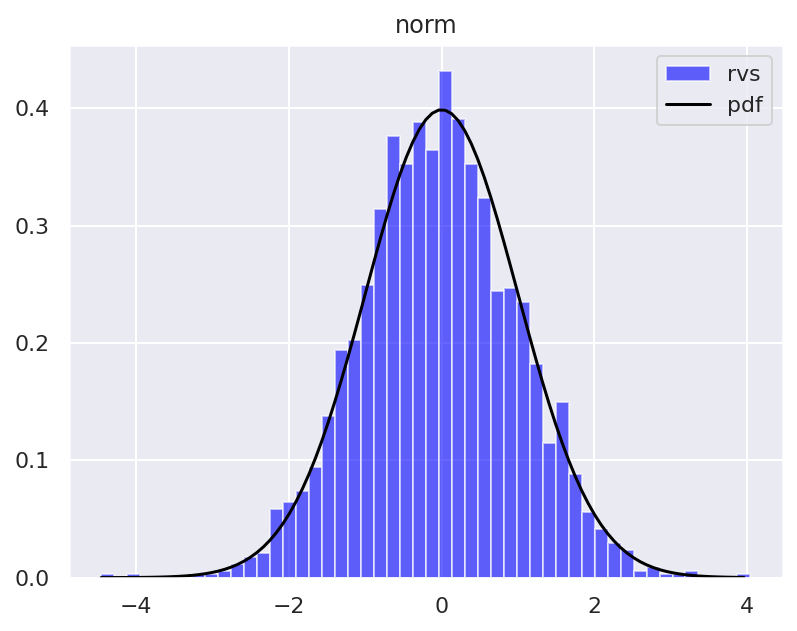

In [ ]:
# Generate a histogram and distribution plot for a normal distribution with a mean of 100 and a standard deviation of 15
plot_hist_dist(norm.rvs(size=2000), norm, title=norm.name)

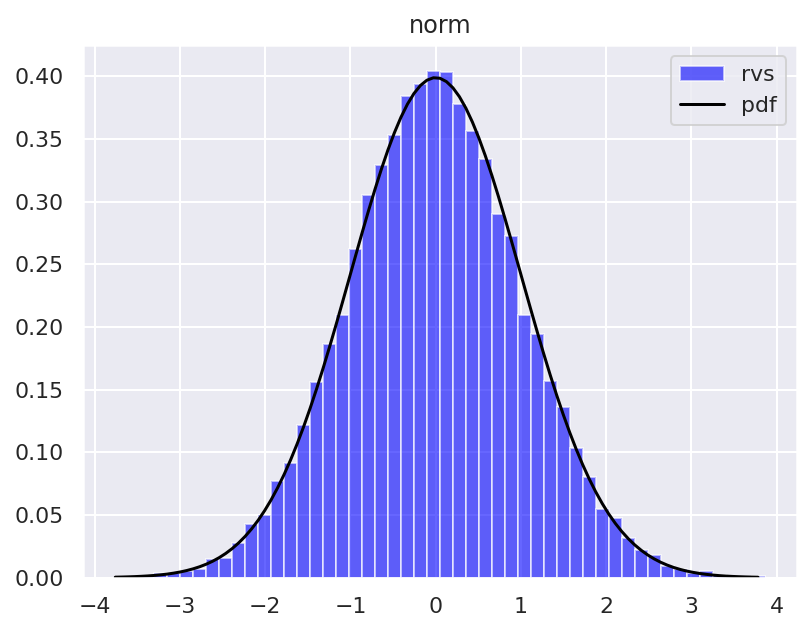

In [ ]:
# Generate a histogram and distribution plot for a normal distribution with 20000 size
plot_hist_dist(norm.rvs(size=20000), norm, title=norm.name)